In [26]:
# CNN on Image Data - CIFAR10

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [28]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [29]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [30]:
test_labels.shape

(10000, 1)

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

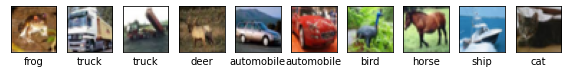

In [32]:
plt.figure(figsize=(32,32))
for i in range(10):
    plt.subplot(32,32,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [33]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [34]:
# # Create the Layers in CNN

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(50))

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5524 - accuracy: 0.4358 - val_loss: 1.3731 - val_accuracy: 0.5173
Epoch 2/10
1080/1563 [===================>..........] - ETA: 16s - loss: 1.1812 - accuracy: 0.5821

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
model.summary()

In [ ]:
image_index = 44
plt.imshow(test_images[image_index].reshape(32, 32, 3),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())